# Research on Car Sales Advertisements

# Introduction

As an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on my site every day. I need to study data collected over the last few years and determine which factors influence the price of a vehicle.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1.-Open-the-data-file-and-study-the-general-information." data-toc-modified-id="Step-1.-Open-the-data-file-and-study-the-general-information.-1">Step 1. Open the data file and study the general information.</a></span></li><li><span><a href="#Step-2.-Data-preprocessing" data-toc-modified-id="Step-2.-Data-preprocessing-2">Step 2. Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Investigating-missing-values" data-toc-modified-id="Investigating-missing-values-2.1">Investigating missing values</a></span></li><li><span><a href="#Checking-if-there-are-duplicates-in-the-data" data-toc-modified-id="Checking-if-there-are-duplicates-in-the-data-2.2">Checking if there are duplicates in the data</a></span></li><li><span><a href="#Converting-the-data-to-the-required-types" data-toc-modified-id="Converting-the-data-to-the-required-types-2.3">Converting the data to the required types</a></span></li></ul></li><li><span><a href="#Step-3.-Make-calculations-and-add-them-to-the-table" data-toc-modified-id="Step-3.-Make-calculations-and-add-them-to-the-table-3">Step 3. Make calculations and add them to the table</a></span></li><li><span><a href="#Step-4.-Carry-out-exploratory-data-analysis" data-toc-modified-id="Step-4.-Carry-out-exploratory-data-analysis-4">Step 4. Carry out exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Plotting-histograms-for-each-parameter" data-toc-modified-id="Plotting-histograms-for-each-parameter-4.1">Plotting histograms for each parameter</a></span></li><li><span><a href="#Interim-conclusions-from-the-histograms" data-toc-modified-id="Interim-conclusions-from-the-histograms-4.2">Interim conclusions from the histograms</a></span></li><li><span><a href="#What-factors-impact-price-most?" data-toc-modified-id="What-factors-impact-price-most?-4.3">What factors impact price most?</a></span></li></ul></li><li><span><a href="#Step-5.-Overall-conclusion" data-toc-modified-id="Step-5.-Overall-conclusion-5">Step 5. Overall conclusion</a></span></li></ul></div>

## Step 1. Open the data file and study the general information. 

Importing libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

data = pd.read_csv("vehicles_us.csv")
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Studying general information and description of data

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


- The general information shows there are missing values in five columns. Majority of the data type looks fine except 4 columns;  `model_year`,`is_4wd`, and `cylinders` should be integer type while `date_posted` should be a datetime data type.
The `is_4wd` column is boolen represented by 0s and 1s. Hence, should be an interger.
The `model_year` contains years and should be an interger.
The number of cylinders in a vehicle follows a whole number pattern and should be an integer (to the best of my knowledge, there are no 1.5, 2.4 etc. number of cylinders).
`date_posted` is a date and should have a datetime format.

- The data description shows some of the quantitative data has its mean closer to the minimum than to the maximum. Some means are greater or differs from the median; potential existence of outliers in the data.


## Step 2. Data preprocessing

###  Investigating missing values

In [4]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

**Considering the `is_4wd` column**

`is_4wd` column shows whether the vehicle has 4-wheel drive or not (Boolean type). Checking to see if they are zeros and ones

In [5]:
data["is_4wd"].unique()

array([ 1., nan])

It is obvious that the missing values are zeros. Hence, the need to fill missing values in `is_4wd` with 0s

In [6]:
data["is_4wd"]=data["is_4wd"].fillna(0)
data["is_4wd"].unique()

array([1., 0.])

**Considering the `Paint_color` column**

Checking unique values and frequencies

In [7]:
data["paint_color"].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

It is not obvious why this column has missing values. Hence, the need to investigate other columns to see if there is a trend. The `type` ,`model`, and `transmision` columns would be investigated for missing values

In [8]:
data[data['paint_color'].isnull()]['type'].value_counts()

SUV            2236
sedan          2189
truck          2135
pickup         1327
coupe           406
wagon           268
hatchback       213
mini-van        202
van             130
convertible      75
other            45
offroad          36
bus               5
Name: type, dtype: int64

In [9]:
data[data['paint_color'].isnull()]['model'].value_counts()

ford f-150                           476
chevrolet silverado 1500             390
ram 1500                             334
jeep wrangler                        235
chevrolet silverado                  212
                                    ... 
kia sorento                           37
chrysler 200                          35
chevrolet trailblazer                 35
chevrolet silverado 3500hd            35
mercedes-benz benze sprinter 2500      7
Name: model, Length: 100, dtype: int64

In [10]:
data[data['paint_color'].isnull()]['transmission'].value_counts()

automatic    8403
manual        514
other         350
Name: transmission, dtype: int64

Automatic cars contain about 90% of cars with missing paint color. However, this does not give a hint to the type of colour missing. Are automatic cars not painted?

In [11]:
data["transmission"].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

Looking at the value counts, it appears the proportionate of automatic cars with no paint to tatal number of automatic cars is not significantly different from other transmissions.
Condering the `type`, and model of cars, the missing values are spread out and do not have pattern. 
There is no obvious pattern in the missings values. Hence, I will not fill.

**Considering the `odometer` column**

The first question that comes to mind considering a zero or missing odometer is whether the condition of the car is new. Hence, the `condition` column would be investigated if new cars account for missing values. From the summation of missing values, missing values in the `model_year` column is far less than the missing values in `odometer`. However, all the missing values in `model_year` could account for missing values in `odomoter`. Is it also the case that some car types or models are excluding odomoter from their advertisement?

In [12]:
data[(data['odometer'].isnull())& (data['model_year'].isnull())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,NaN,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-05-13,57
370,4700,NaN,kia soul,good,NaN,gas,NaN,manual,sedan,white,0.0,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,0.0,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,NaN,0.0,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,0.0,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,0.0,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-16,83


In [13]:
data[data['odometer'].isnull()]['condition'].value_counts()

excellent    3800
good         3092
like new      728
fair          237
new            18
salvage        17
Name: condition, dtype: int64

In [14]:
data[data['odometer'].isnull()]['type'].value_counts()

sedan          1901
SUV            1894
truck          1859
pickup         1093
coupe           340
wagon           234
mini-van        166
hatchback       139
van             138
convertible      67
other            33
offroad          27
bus               1
Name: type, dtype: int64

In [15]:
data[data['odometer'].isnull()]['model'].value_counts()

ford f-150                  419
chevrolet silverado 1500    322
ram 1500                    279
chevrolet silverado         192
ram 2500                    181
                           ... 
jeep cherokee                34
ford f350                    33
nissan murano                32
ford f350 super duty         29
dodge dakota                 26
Name: model, Length: 100, dtype: int64

Like `paint_color`, there is no clear pattern of missing values in `odometer`. However, unlike paint color, every car is expected to have a mileage unless it is brand new. In dealing with missing values, one could argue to fill missing values group by mean/median of model year or the condition of the car, but different types of models having the same model year or condition could have far different odometers as some cars have higher mileage than others. Therefore, I would fill missing values of the odometer column grouped by median (due to potential outliers in data) of models. This would give a good reflection of specific models and their attributed mileage. 

In [16]:
data["odometer"] = data["odometer"].fillna(round(data.groupby("model")["odometer"].transform("median"),0))
data["odometer"].isnull().sum()

41

Investigating why there are still missing values in `odometer`

In [17]:
data[data["odometer"].isnull()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-01-15,16
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-12-04,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-08-23,70
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2019-04-12,31
4149,34900,NaN,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,0.0,2018-10-12,28


It apppears the model type `mercedes-benz benze sprinter 2500` do not have a single odometer value. Hence, it accounts for the 41 missing values. Let's confirm

In [18]:
data.query('model =="mercedes-benz benze sprinter 2500"').shape[0]

41

Since there is no value for this model, it is not feasible to assume any value. Hence, I would drop this model

In [19]:
data.drop(data[data['model'] =="mercedes-benz benze sprinter 2500"].index, inplace=True)
data["odometer"].isnull().sum()

0

Checking if there are cars with 0 odometer 

In [20]:
data[data["odometer"]==0].shape[0]

185

Are these cars new?

In [21]:
data[(data["odometer"]==0) & (data["condition"]=="new")]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


Since the cars with 0 mileage are not new, I have to drop them as every used car should have a mileage

In [22]:
data.drop(data[data["odometer"]==0].index,inplace=True)
data.shape[0]

51299

**Considering the `model_year` column**

Are some car types or  models not reporting their model year?

In [23]:
data[data['model_year'].isnull()]['type'].value_counts()

SUV            915
sedan          843
truck          833
pickup         504
coupe          145
wagon          109
mini-van        86
hatchback       73
van             32
convertible     27
other           22
offroad         10
Name: type, dtype: int64

In [24]:
data[data['model_year'].isnull()]['model'].value_counts()

ford f-150                    191
chevrolet silverado 1500      153
ram 1500                      117
chevrolet silverado            98
honda accord                   80
                             ... 
buick enclave                  14
chevrolet silverado 3500hd     14
hyundai santa fe               13
acura tl                       12
honda civic lx                 11
Name: model, Length: 99, dtype: int64

Missing values in model year are spread out. 
I would fill missing values in the model year column grouped by median of models.

In [25]:
data["model_year"] = data["model_year"].fillna(round(data.groupby("model")["model_year"].transform("median"),0))

The data description showed the earliest year a car was producded was in 1908. According to literature, this should be Ford Model T. Let's confirm the year and investigate.

In [26]:
data["model_year"].min()

1908.0

In [27]:
data[data["model_year"]==1908.0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,SUV,black,0.0,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,129176.0,automatic,SUV,white,0.0,2018-06-24,25


The output showed different models. `gmc yukon` car model was first released in 1991 while `cadillac escalade` was released in 1999. Also, the first automatic transmission in a production car was GM's Hydramatic, introduced in 1939. Hence, the two records are not accurate. Thus, I would drop them.   

In [28]:
data.drop(data[data["model_year"]==1908.0].index, inplace=True)

**Considering the `cylinders` column**

It is only electric cars that do not have cylinders. There is the need to investigate if they account for missing values. Again, are there some specific car types and models that are not reporting their number of cylinders in the adds?

In [29]:
data[(data["cylinders"]==0) & (data["fuel"]=="electric")]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


The output shows there is none electric fuel car with zero cylinder. However, an electric fuel car must have zero cylinder. Hence, I would replace electric fuel vehicles with zero cylinder

In [30]:
data["cylinders"]=data["cylinders"].where((data["fuel"]!="electric"),0)
data[data["fuel"]=="electric"]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2432,7900,2011.0,toyota prius,good,0.0,electric,78466.0,automatic,sedan,NaN,0.0,2018-09-13,34
9626,1,2018.0,chevrolet silverado,new,0.0,electric,30000.0,automatic,truck,red,1.0,2018-11-21,64
20988,10200,2008.0,toyota tundra,excellent,0.0,electric,131984.0,automatic,truck,NaN,1.0,2019-02-19,20
22190,15000,2017.0,ford focus,like new,0.0,electric,12000.0,automatic,hatchback,white,0.0,2018-11-16,66
46423,4400,2008.0,chevrolet impala,excellent,0.0,electric,120946.0,automatic,other,red,0.0,2018-11-19,36
49643,4700,2007.0,toyota prius,excellent,0.0,electric,134000.0,automatic,hatchback,custom,0.0,2019-02-18,39


Investigating missing values in the `cylinders` column

In [31]:
data[data['cylinders'].isnull()]['type'].value_counts()

truck          1262
sedan          1248
SUV            1222
pickup          712
coupe           221
wagon           162
hatchback       128
mini-van        127
van              57
convertible      36
other            31
offroad          22
bus               4
Name: type, dtype: int64

In [32]:
data[data['cylinders'].isnull()]['model'].value_counts()

ford f-150                     315
chevrolet silverado 1500       229
ram 1500                       185
chevrolet silverado            136
ram 2500                       122
                              ... 
chevrolet silverado 3500hd      22
ford f150 supercrew cab xlt     20
ford f350 super duty            20
dodge dakota                    18
bmw x5                          16
Name: model, Length: 99, dtype: int64

Missing values in cylinders are spread out, and do not have a clear pattern. However, as every fuel vehicle should have a cylinder except electric cars. I would fill missing values in the cylinders column grouped by median of models.

In [33]:
data["cylinders"] = data["cylinders"].fillna(round(data.groupby("model")["cylinders"].transform("median"),0))

Checking if there still exist missing values in data aside `paint_color`

In [34]:
data.isnull().sum()

price              0
model_year         0
model              0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
type               0
paint_color     9229
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Missing values have been identified and dealt with

### Checking if there are duplicates in the data

Counting duplicates in the entire dataset as individual columns do not have unique values (like id numbers) that can be detected. 

In [35]:
data.duplicated().sum()

0

There are no duplicates in the data

### Converting the data to the required types

i.e. `model_year`,`is_4wd`, `cylinders`, and `date_posted`

In [36]:
data["model_year"]=data["model_year"].astype("int64")
data["is_4wd"]=data["is_4wd"].astype("int64")
data["cylinders"]=data["cylinders"].astype("int64")
data["date_posted"]=pd.to_datetime(data["date_posted"], format = "%Y-%m-%d")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51297 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51297 non-null  int64         
 1   model_year    51297 non-null  int64         
 2   model         51297 non-null  object        
 3   condition     51297 non-null  object        
 4   cylinders     51297 non-null  int64         
 5   fuel          51297 non-null  object        
 6   odometer      51297 non-null  float64       
 7   transmission  51297 non-null  object        
 8   type          51297 non-null  object        
 9   paint_color   42068 non-null  object        
 10  is_4wd        51297 non-null  int64         
 11  date_posted   51297 non-null  datetime64[ns]
 12  days_listed   51297 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 5.5+ MB


Data converted to required types 

## Step 3. Make calculations and add them to the table

I will calculate and add the following columns
1. Day of the week, month, and year the ad was placed
2. The vehicle's age (in years) when the ad was placed
3. The vehicle's average mileage per year

In [37]:
data["day_of_the_week"] =data["date_posted"].dt.weekday
data["month"]=data["date_posted"].dt.month
data["year"]=data["date_posted"].dt.year

In [38]:
data["vehicle_age"] = data["year"] - data["model_year"]

In [39]:
data["average_mileage"] = (data["odometer"]/data["vehicle_age"]).where(data["vehicle_age"]!= 0,data["odometer"])

Replacing string values with a numeric scale in the "condition" column

In [40]:
def conditions (scale):
    """The function replaces string values with a numeric scale in the condition column"""
    condition = scale["condition"]
    if condition == "new":
        return 5
    elif condition == "like new":
        return 4
    elif condition == "excellent":
        return 3
    elif condition == "good":
        return 2
    elif condition == "fair":
        return 1
    return 0
data["condition"]= data.apply(conditions,axis =1)

In [41]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_the_week,month,year,vehicle_age,average_mileage
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,NaN,1,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2011,ford f-150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,121928.0,automatic,pickup,NaN,0,2019-03-22,9,4,3,2019,16,7620.500000
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000


New columns added

## Step 4. Carry out exploratory data analysis

Dictionary selection for histogram visualisation

In [42]:
hist_data= data[["price", "vehicle_age","odometer", "cylinders","condition"]]

### Plotting histograms for each parameter

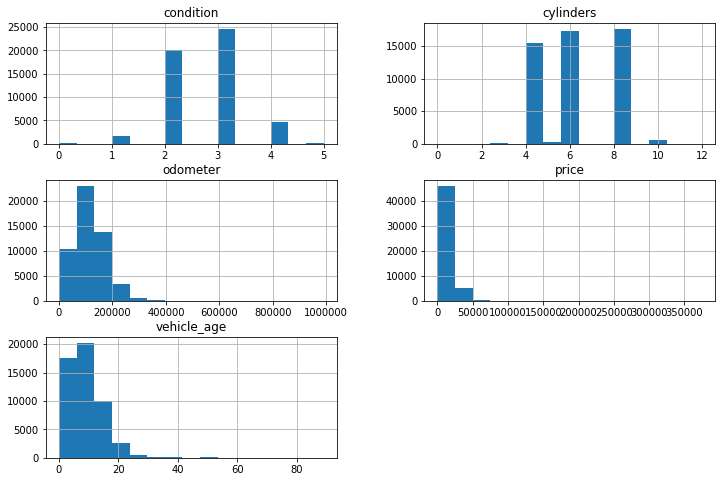

In [43]:
hist_data.hist(figsize =(12,8), bins=15)
plt.show()

**Filter outliers and replot histogtrams**

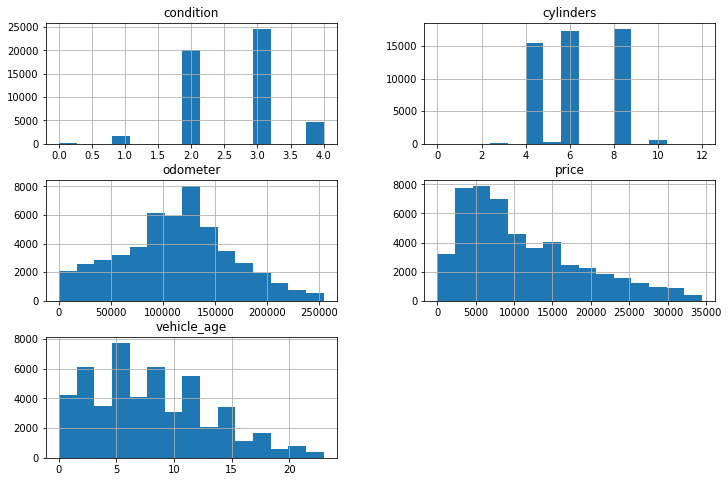

In [44]:
Q1 = hist_data.quantile(0.25)
Q3 = hist_data.quantile(0.75)
IQR = Q3 - Q1

hist_data_filter = hist_data[(hist_data < (Q3 + 1.5 * IQR))]
hist_data_filter.hist(figsize=(12,8), bins= 15)
plt.show()

### Interim conclusions from the histograms
1. Considering the car conditions, the most frequently advertised car conditions (with and without outliers) is when the car's
condition is excellent(3). Here, the few outliers does not significantly affect the redability of the histogram.
2. Considering the car cylinders, the mostly frequently used number of cylinders are 8 and 6 followed by 4. 
As there are virtually no outliers  in this column, the histograms are the same.
3. Considering the odometer histogram, outliers significantly afffect the readability of the histogram.  
With outliers,the histogram peaks between 0 and 200000 mileage with a frequency above 20000. However, without outliers, 
the most frequent odometer is about 8000, with a modal value contained between mileage 100000 and 150000. Without outliers, 
the odometer looks far less skewed; it is more skewed with outliers.
4. Considering the price histogram, again outliers significantly afffect the readability of the histogram. With outliers, 
it is peaking above a frequncy of 40000 with car price between 0 and 25000. However,without outliers, 
the histogram peaks around a price of 5000 and a frequency of about 8000. Even though both are skewed,
the histogram is much flatter without outliers.
5. Considering the vehicle age histogram, outliers significantly afffect the readability of the histogram. Without outliers, 
the histogram is much flatter and peaks at a different vehicle age.

**Ploting a histogram of the number of days advertisements are displayed**

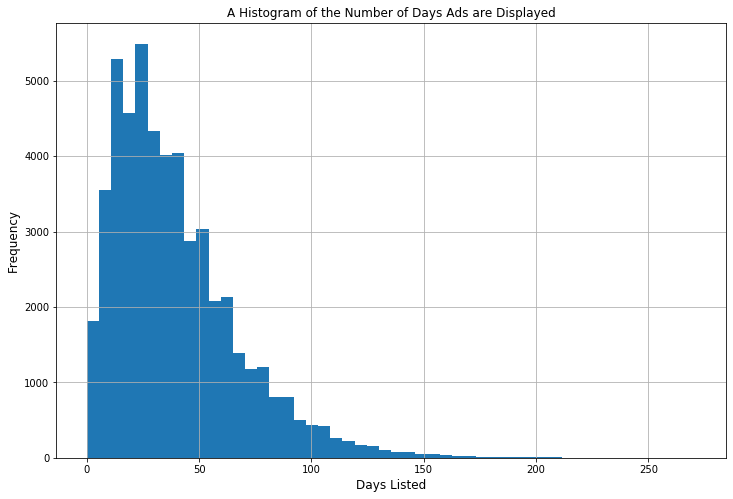

In [45]:
ax= data["days_listed"].hist(bins=50, figsize=(12,8))
ax.set_ylabel("Frequency", fontdict={"size":12})
ax.set_xlabel("Days Listed", fontdict={"size":12})
plt.title("A Histogram of the Number of Days Ads are Displayed", fontdict={"size":12})
plt.show()

Calculating the mean and median of the number of days advertisements are posted to help describe a typical lifetime of an add

In [46]:
round(data["days_listed"].mean(),0)

40.0

In [47]:
round(data["days_listed"].median(),0)

33.0

In [48]:
data[data["days_listed"]>150].shape[0] #number of times adds lasted for more than 150 days

242

In [49]:
data[data["days_listed"]<1].shape[0]# number of times adds did no last up to a day

54

From the histogram, the most frequent days that adds lasted are between 0 and 50 days.
On average, an add typically last about 40 days. Using 150 days as benchmark (abnormally long time for adds), there were 242 instances where adds lasted for more days. The discriptive statistics of the data showed an add lasted for 271 days (the highest). In 54 instances, adds lasted for less than a day (were removed quickly).

**Analyzing the number of ads and the average price for each type of vehicle**

In [50]:
hist_data_filter["type"]=data["type"] #adding "type" column to dictionary

In [51]:
adds = hist_data_filter.pivot_table(index="type", values= ["price"], aggfunc =["count", "mean"])
adds.columns= ["number_of_adds", "average_price"]
adds

,number_of_adds,average_price
type,,
SUV,12053,10316.420559
bus,24,17135.666667
convertible,418,12399.313397
coupe,2218,13276.918395
hatchback,1042,6827.960653
mini-van,1157,8004.687986
offroad,206,13177.674757
other,248,10562.552419
pickup,6602,14598.299303


**Ploting a bar chart showing the dependence of the number of ads on the vehicle type.**

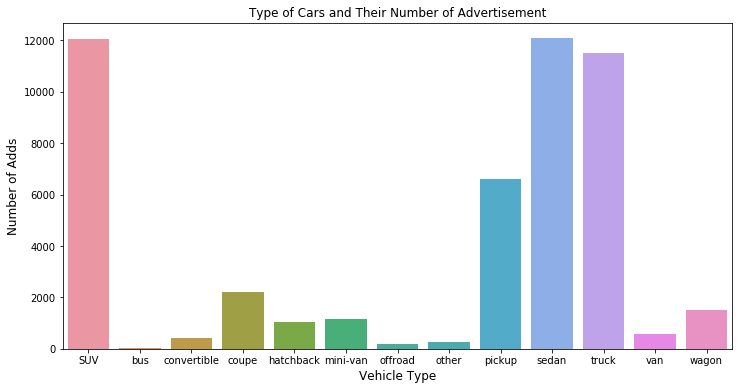

In [52]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.barplot(x=adds.index, y="number_of_adds", data=adds, ax=ax, capsize=10)
plt.title("Type of Cars and Their Number of Advertisement",fontdict={"size":12})
plt.ylabel("Number of Adds", fontdict={"size":12})
plt.xlabel("Vehicle Type", fontdict={"size":12})
plt.show()

Selecting the two vehicle types with the greatest number of ads:

From the graph, these are "sedan" and "SUV". 
However, I would sort the "adds" DataFrame and slice by index

In [53]:
adds_top_2=adds.sort_values(by="number_of_adds", ascending=False).index[0:2]
adds_top_2.tolist()

['sedan', 'SUV']

Bus has the lowest number of adds but the highest average price.
Sedan and SUV are the two vehicle types with the greatest number of adds

### What factors impact price most?

Checking whether price depends on vehicle age, mileage, condition, transmission type, and color.

Adding two categorical columns of interest to the filtered data

In [54]:
hist_data_filter[["transmission", "paint_color"]] =data[["transmission", "paint_color"]]
hist_data_filter

,price,vehicle_age,odometer,cylinders,condition,type,transmission,paint_color
0,9400.0,7.0,145000.0,6,2.0,SUV,automatic,NaN
1,25500.0,7.0,88705.0,6,2.0,pickup,automatic,white
2,5500.0,6.0,110000.0,4,4.0,sedan,automatic,red
3,1500.0,16.0,121928.0,8,1.0,pickup,automatic,NaN
4,14900.0,2.0,80903.0,4,3.0,sedan,automatic,black
...,...,...,...,...,...,...,...,...
51520,9249.0,5.0,88136.0,6,4.0,sedan,automatic,black
51521,2700.0,16.0,181500.0,4,0.0,sedan,automatic,white
51522,3950.0,9.0,128000.0,4,3.0,sedan,automatic,blue
51523,7455.0,5.0,139573.0,4,2.0,sedan,automatic,black


Checking if transmission types have at least 50 adds; else their parameters won't be valid for analysis. 

In [55]:
hist_data_filter["transmission"].value_counts()

automatic    46690
manual        2818
other         1789
Name: transmission, dtype: int64

**Plotting a boxplot to see if price depends on the transmision type**

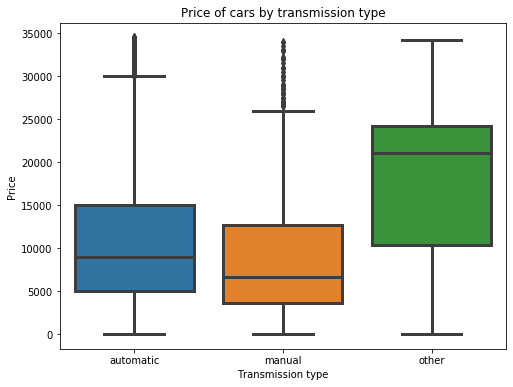

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.boxplot(x="transmission", y="price", data =hist_data_filter, linewidth =3, ax=ax)
plt.title("Price of cars by transmission type")
plt.ylabel("Price")
plt.xlabel("Transmission type")
plt.show()

Price depends on the transmission type; `Other` transmission (which could be continuously variable transmission (CVT) or Semi-automatic & dual-clutch transmissions) have a wider middle prices and a higher median price compared to `manual` and `automatic` transmissions. The transmission with the least median price is `manual`.

Checking if each paint color  type has at least 50 adds

In [57]:
hist_data_filter["paint_color"].value_counts()

white     9985
black     7631
silver    6225
grey      5023
blue      4458
red       4407
green     1392
brown     1221
custom    1143
yellow     252
orange     230
purple     101
Name: paint_color, dtype: int64

**Plotting a boxplot to see if price depends on the paint color**

In [58]:
ordered=hist_data_filter.groupby("paint_color")["price"].sum().sort_values().reset_index()["paint_color"]
ordered

0     purple
1     orange
2     yellow
3     custom
4      green
5      brown
6       blue
7        red
8       grey
9     silver
10     black
11     white
Name: paint_color, dtype: object

In [59]:
hist_data_filter

,price,vehicle_age,odometer,cylinders,condition,type,transmission,paint_color
0,9400.0,7.0,145000.0,6,2.0,SUV,automatic,NaN
1,25500.0,7.0,88705.0,6,2.0,pickup,automatic,white
2,5500.0,6.0,110000.0,4,4.0,sedan,automatic,red
3,1500.0,16.0,121928.0,8,1.0,pickup,automatic,NaN
4,14900.0,2.0,80903.0,4,3.0,sedan,automatic,black
...,...,...,...,...,...,...,...,...
51520,9249.0,5.0,88136.0,6,4.0,sedan,automatic,black
51521,2700.0,16.0,181500.0,4,0.0,sedan,automatic,white
51522,3950.0,9.0,128000.0,4,3.0,sedan,automatic,blue
51523,7455.0,5.0,139573.0,4,2.0,sedan,automatic,black


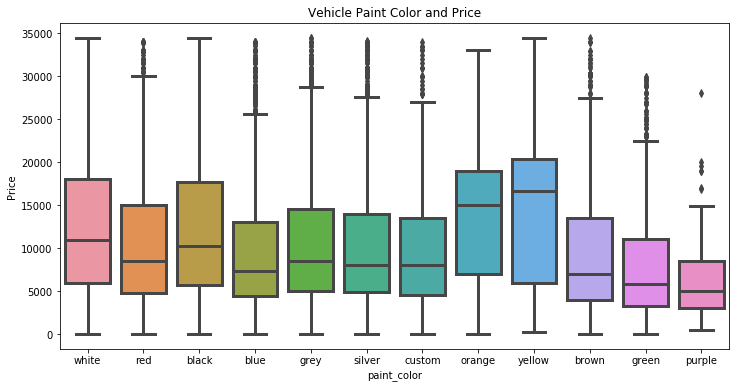

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.boxplot(x="paint_color", y="price", data =hist_data_filter, linewidth =3, ax=ax)
plt.title("Vehicle Paint Color and Price")
plt.ylabel("Price")
plt.xlabel("paint_color")
plt.show()

Price of a vehicle depends on the paint color. colours yellow, white, and orange dominate with median prices. 
The least median price is purple color. 

**Previewing the correlation among the quantitative variables with a seaborn heatmap**

Note: The `condition` column is a categorical variable. Therefore, the correlation would be done by using a `point-biserial correlation`.

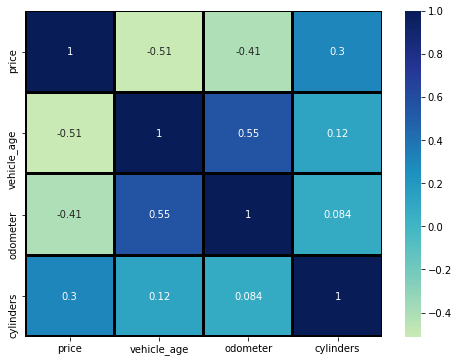

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.heatmap(hist_data_filter[["price", "vehicle_age", "odometer", "cylinders"]].corr(), annot = True,linewidths=2, linecolor='black',center= 0, cmap ="YlGnBu", ax=ax)
plt.show()

In [62]:
condition=hist_data_filter.query('condition!="nan" & price!="nan"')

In [63]:
print("Correlation between the condition of a vehicle and its' price: {}".format(stats.pointbiserialr(condition["condition"],condition["price"])))

Correlation between the condition of a vehicle and its' price: PointbiserialrResult(correlation=0.19919407104413067, pvalue=0.0)


Vehicle's age influences price the most (adverse effect). This is followed by a vehicle's mileage(also adverse effect). Among the three quantitative variables, the number of cylinders in a vehicle although has positive correlation with price, it has the least impact on price. There is also a positive and significant relation between the condition of a vehicle and its' price.

**Displaying the relationships in scatter plots**

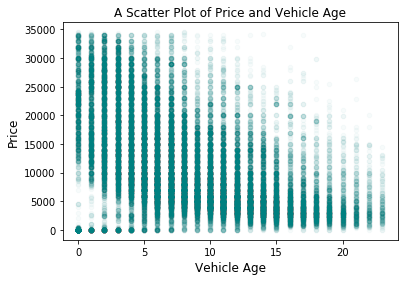

In [64]:
hist_data_filter.plot(y="price", x= "vehicle_age", kind="scatter", color= "teal",alpha=.03)
plt.title("A Scatter Plot of Price and Vehicle Age",fontdict={"size":12})
plt.ylabel("Price", fontdict={"size":12})
plt.xlabel("Vehicle Age", fontdict={"size":12})
plt.show()

It is clear that as a vehecle's age goes up, it's price falls.

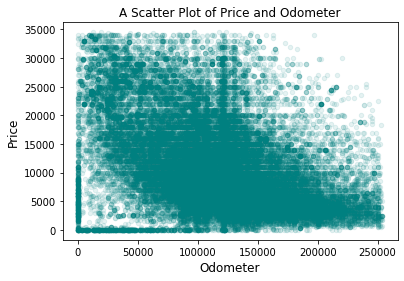

In [65]:
hist_data_filter.plot(y="price", x= "odometer", color= "teal", kind="scatter", alpha=.1)
plt.title("A Scatter Plot of Price and Odometer",fontdict={"size":12})
plt.ylabel("Price", fontdict={"size":12})
plt.xlabel("Odometer", fontdict={"size":12})
plt.show()

The more mileage a vehicle has, the lower the price

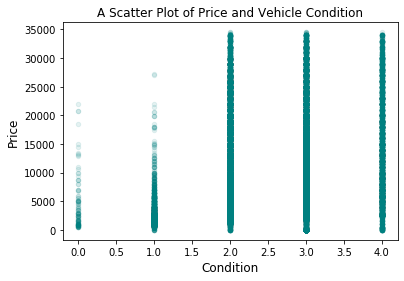

In [66]:
hist_data_filter.plot(y="price", x= "condition", color="teal", kind="scatter", alpha=.1)
plt.title("A Scatter Plot of Price and Vehicle Condition",fontdict={"size":12})
plt.ylabel("Price", fontdict={"size":12})
plt.xlabel("Condition", fontdict={"size":12})
plt.show()

Cars in at least a good condition (2 or more), have higher prices.

## Step 5. Overall conclusion
- Outliers significantly affect the readability of histograms.
- On average, a typical add last for about  40 days. About 54 adds lasted less than a day. The abnormally longest time an add lasted was 271 days.
- Bus vehicle type have the lowest number of adds but the highest average price. Sedan and SUV are the vehicle types with the highest number of adds.
- Vehicle price depends on the type of vehicle transmission: `Other`transmissions  have the highest median prices. Manuel transmissions have the lowest median prices.
- A vehicle's price depends on the paint color type. 
- The older a vehicle, the lower the price. Among the quantitative variables considered, a vehicle's age correlates the greatest with price.  
- The higher a vehicle's mileage, the lower the price.
- A vehicle in at least a good condition has a higher price than fair and salvage vehicles.